<a href="https://colab.research.google.com/github/arezyhs/dicoding-machinelearning-finalproject-rockpaperscissor/blob/main/mlfinalsubmission_akbar_setiyawan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Proyek Akhir : Klasifikasi Gambar** Rock-Paper-Scissor

NAMA: AKBAR REZY HANARA SETIYAWAN

In [3]:
# Libraries we used.
import zipfile
import os
import glob
import warnings

from tensorflow import keras
from tensorflow.keras.utils import img_to_array
from tensorflow.keras import layers
from tensorflow.keras.utils import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dense, Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


1. Download lalu ekstrak dataset yang didapat

In [4]:
# Mendapatkan files
!wget https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip

# !Unzip ekstrak files
!unzip rockpaperscissors.zip -d /dataset


Streaming output truncated to the last 5000 lines.
  inflating: /dataset/rockpaperscissors/scissors/KNNsNhduqSfuqEK5.png  
  inflating: /dataset/__MACOSX/rockpaperscissors/scissors/._KNNsNhduqSfuqEK5.png  
  inflating: /dataset/rockpaperscissors/scissors/xAnfzBYnsnuru9Nf.png  
  inflating: /dataset/__MACOSX/rockpaperscissors/scissors/._xAnfzBYnsnuru9Nf.png  
  inflating: /dataset/rockpaperscissors/scissors/caj9PiWZ2BenuxXF.png  
  inflating: /dataset/__MACOSX/rockpaperscissors/scissors/._caj9PiWZ2BenuxXF.png  
  inflating: /dataset/rockpaperscissors/scissors/5CzwWCDnxKOJz5T0.png  
  inflating: /dataset/__MACOSX/rockpaperscissors/scissors/._5CzwWCDnxKOJz5T0.png  
  inflating: /dataset/rockpaperscissors/scissors/7dBQ0fOpCs03OmnR.png  
  inflating: /dataset/__MACOSX/rockpaperscissors/scissors/._7dBQ0fOpCs03OmnR.png  
  inflating: /dataset/rockpaperscissors/scissors/DXQaN15KphkE4i7z.png  
  inflating: /dataset/__MACOSX/rockpaperscissors/scissors/._DXQaN15KphkE4i7z.png  
  inflating: /datas

2. Lokasi dataset

In [5]:
# Lokasi yang digunakan.
dir_dataset = "/dataset/rockpaperscissors/rps-cv-images"
dir_paper = os.path.join("/dataset/rockpaperscissors/rps-cv-images/paper")
dir_rock = os.path.join("/dataset/rockpaperscissors/rps-cv-images/rock")
dir_scissors = os.path.join("/dataset/rockpaperscissors/rps-cv-images/scissors")

# Mengecek jumlah data.
total_image = len(list(glob.iglob("/dataset/rockpaperscissors/rps-cv-images/*/*.*", recursive=True)))
print("Total Data Image JPEG     : ",total_image)

total_paper = len(os.listdir(dir_paper))
total_rock = len(os.listdir(dir_rock))
total_scissors = len(os.listdir(dir_scissors))

# Print jumlah data.
print("Total Data Paper Image      : ",total_paper)
print("Total Data Rock Image       : ",total_rock)
print("Total Data Scissors Image  : ",total_scissors)

Total Data Image JPEG     :  2188
Total Data Paper Image      :  712
Total Data Rock Image       :  726
Total Data Scissors Image  :  750


3. Implementasi Image Data Generator menggunakan TensorFlow untuk mengolah gambar

In [6]:
# Ukuran validation set 40%
val_size = 0.4

# Train data generator
Train_datagen = ImageDataGenerator(
    rotation_range = 30,
    brightness_range = [0.2,1.0],
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = "nearest",
    rescale = 1./255,
    validation_split = val_size
)

# Train validation datagen
Validation_datagen = ImageDataGenerator(
    rescale = 1./255,
    validation_split = val_size
)

4. Split Dataset menjadi **Train dan Validation** dengan ukuran validasi ***40%***

In [7]:
# Set lebar tinggi gambar
img_width = 300
img_height = 300

# Train generator.
Train_generator = Train_datagen.flow_from_directory(
    dir_dataset,
    target_size = (img_width,img_height),
    color_mode = "rgb",
    class_mode = "categorical",
    batch_size = 16,
    shuffle = True,
    subset = "training"
)

# Validation generator.
Validation_generator = Validation_datagen.flow_from_directory(
    dir_dataset,
    target_size = (img_width,img_height),
    color_mode = "rgb",
    class_mode = "categorical",
    batch_size = 16,
    shuffle = False,
    subset = "validation"
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


5. Model harus menggunakan **model sequential**.


In [8]:
Model = Sequential(
    [
     # aktivasi relu + softmax
     Conv2D(32, (3,3), strides = (1,1), activation = 'relu' , input_shape = (img_width,img_height,3)),
     MaxPooling2D(pool_size = (2,2), padding = 'valid'),
     Conv2D(64, (3,3), strides = (1,1), activation = 'relu' ),
     MaxPooling2D(pool_size = (2,2), padding = 'valid'),
     Conv2D(128, (3,3), strides = (1,1), activation = 'relu' ),
     MaxPooling2D(pool_size = (2,2), padding = 'valid'),
     Flatten(),

     # dropout 40%
     Dropout(0.4),

     Dense(128, activation = 'relu'),
     Dense(3, activation='softmax')
    ]
)

6. Tambah optimizer 'adam'

In [9]:
# optimizer 'Adam'
Adam(learning_rate=0.00146, name='Adam')
Model.compile(optimizer = 'Adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])


7. Learning rate schedule + callback

In [10]:
def scheduler(epoch, lr):
  if epoch < 5:
    return lr
  else:
    return lr * tf.math.exp(-0.1)

lr_schedule = tf.keras.callbacks.LearningRateScheduler(scheduler, verbose=1)
tb_callback = tf.keras.callbacks.TensorBoard(
    log_dir='logs', histogram_freq=0, write_graph=True, write_images=False,
    update_freq='epoch', embeddings_freq=0,
    embeddings_metadata=None
)

Model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 149, 149, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 73, 73, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 35, 35, 128)       0

8. Proses Training Dataset

In [11]:
# Proses Training
batch_size = 32

# Callback accuracy dan val accuracy dengan threshold 0.98
class CustomCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get('accuracy') > 0.98 and logs.get('val_accuracy') > 0.98:
            self.model.stop_training = True

custom_callback = CustomCallback()

with tf.device("/device:GPU:0"):
  history = Model.fit(Train_generator,
                    epochs =  10,
                    steps_per_epoch = 1314//batch_size,
                    validation_data = Validation_generator,
                    verbose = 1,
                    validation_steps = 874//batch_size,
                    callbacks =[lr_schedule, tb_callback, custom_callback])



Epoch 1: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/10
41/41 [==============================] - 179s 4s/step - loss: 1.1385 - accuracy: 0.3707 - val_loss: 0.8598 - val_accuracy: 0.3426 - lr: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 2/10
41/41 [==============================] - 181s 4s/step - loss: 1.0886 - accuracy: 0.3785 - val_loss: 0.8986 - val_accuracy: 0.5972 - lr: 0.0010

Epoch 3: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 3/10
41/41 [==============================] - 186s 5s/step - loss: 0.9664 - accuracy: 0.5305 - val_loss: 1.1400 - val_accuracy: 0.5139 - lr: 0.0010

Epoch 4: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 4/10
41/41 [==============================] - 194s 5s/step - loss: 0.8266 - accuracy: 0.6479 - val_loss: 0.6736 - val_accuracy: 0.7569 - lr: 0.0010

Epoch 5: LearningRateScheduler setting learning rate to 0.00100

9. Plot akurasi dan loss

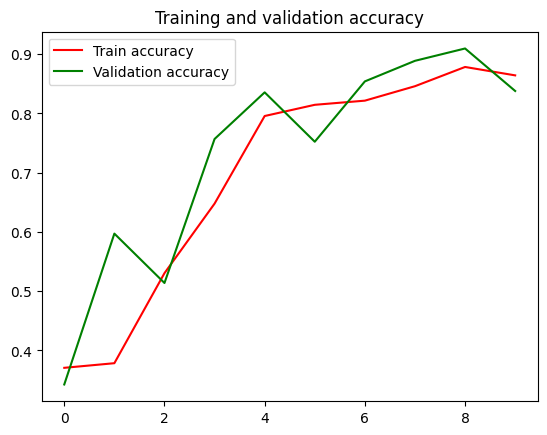

<Figure size 640x480 with 0 Axes>

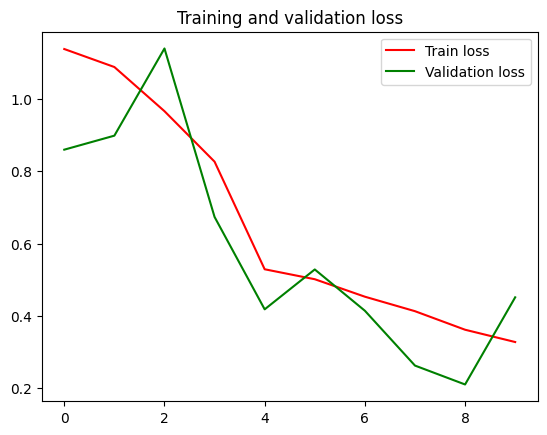

<Figure size 640x480 with 0 Axes>

In [12]:
# Mengukur nilai akurasi
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Mengambil nilai loss
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

# Plot akurasi
plt.plot(epochs, acc, 'r', label='Train accuracy')
plt.plot(epochs, val_acc, 'g', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

# Plot Loss
plt.plot(epochs, loss, 'r', label='Train loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

10. Image Prediction

Saving crYtjQcVKQjCAWYq.png to crYtjQcVKQjCAWYq.png
1/1 [==============================] - 0s 260ms/step


Hasil Prediksi :  [1. 0. 0.] 

Kategori Gambar : Paper


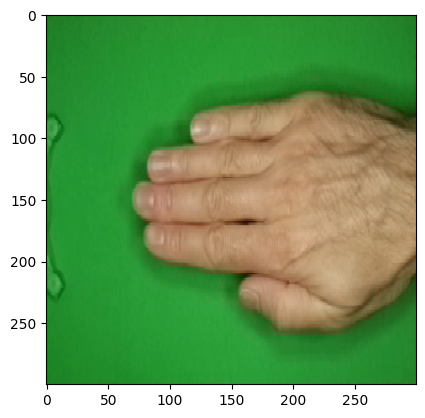

In [13]:
# User upload file ke collaboratory
uploaded = files.upload()
for file_upload in uploaded.keys():

  path = file_upload

  img = tf.keras.utils.load_img(path, target_size=(300,300))
  imgplot = plt.imshow(img)
  x = tf.keras.utils.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  # Membuat numpy vstack array untuk hasil prediksi
  images = np.vstack([x])
  classes = Model.predict(images, batch_size=16)

  print("\n")
  print('Hasil Prediksi : ',classes[0],'\n')

  if classes[0][0] == 1:
    print('Kategori Gambar : Paper')
  elif classes[0][1] == 1:
    print('Kategori Gambar : Rock')
  else:
    print('Kategori Gambar : Scissor')